# MACHINE LEARNING LAB

## EXERCISE 8

### Aim : 
Download MNIST dataset, apply PCA from scratch.  

### Algorithm : 
PCA is the technic of dimensionality reduction. dimensionality reduction is nothing but the reduction of n dimension data to n’ dimension data, where n > n’

MNIST dataset - contains the information of handwritten digits 0 to 9. in this dataset the information of single-digit is stored in the form of 784*1 array, where the single element of 784*1 array represents a single pixel of 28*28 image
 
1. **Standardize the Data:**
   - Compute the mean of each feature in the dataset.
   - Subtract the mean from each feature to center the data around the origin.
   - Optionally, divide by the standard deviation to scale the features.

2. **Compute the Covariance Matrix:**
   - Calculate the covariance matrix of the standardized data.
   - The covariance matrix represents the relationships between different features in the dataset.

3. **Eigenvalue Decomposition:**
   - Perform eigenvalue decomposition on the covariance matrix.
   - Obtain the eigenvectors and eigenvalues of the covariance matrix.
   - Sort the eigenvectors based on their corresponding eigenvalues in descending order.
   - Select the top k eigenvectors to form the principal components, where k is the desired number of dimensions in the reduced dataset.
   - Project the standardized data onto the selected eigenvectors to obtain the principal components.

### Code and Output : 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv(r"C:\Users\TEJU\OneDrive\Desktop\ML LAB EXERCISES\Exercise 8\train.csv")

In [7]:
df.shape

(42000, 785)

In [8]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#extracting label column from the dataset
label=df['label']
df.drop('label',axis=1,inplace=True)

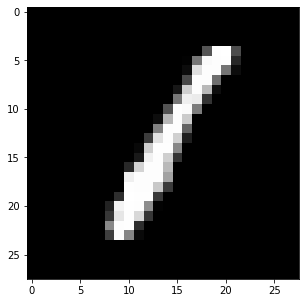

1


In [10]:
#generating a random index ind between 0 and 20000 
#using this index to select a row from df
#converting it to a NumPy array
#reshaping it into a 28x28 grid
#displaying it as an image using plt.imshow()
ind = np.random.randint(0, 20000)
plt.figure(figsize = (20, 5))
grid_data = np.array(df.iloc[ind]).reshape(28,28)
plt.imshow(grid_data, interpolation = None, cmap = 'gray')
plt.show()
print(label[ind])

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)
df.shape

(42000, 784)

In [12]:
#computes covariance matrix by taking matrix multiplication of transpose with itself
covar_mat = np.matmul(df.T, df)
covar_mat.shape

(784, 784)

In [13]:
#to compute eigen values and eigen vectors
from scipy.linalg import eigh
values, vectors = eigh(covar_mat, eigvals = (782, 783))
print("Dimensions of Eigen vector:", vectors.shape)
#transposes to ensure each eigen vector is a column vector
vectors = vectors.T
print("Dimensions of Eigen vector:", vectors.shape)

Dimensions of Eigen vector: (784, 2)
Dimensions of Eigen vector: (2, 784)


In [17]:
#dot product of transposed eigen vector matrix and standardised data matrix
final_df = np.matmul(vectors, df.T)
print("vectors:", vectors.shape, "\n", "std_df:", df.T.shape, "\n", "final_df:", final_df.shape)

vectors: (2, 784) 
 std_df: (784, 42000) 
 final_df: (2, 42000)


In [18]:
#combines the final_df array (which contains the transformed data after PCA) and the label array vertically 
final_dfT = np.vstack((final_df, label)).T
dataFrame = pd.DataFrame(final_dfT, columns = ['pca_1', 'pca_2', 'label'])
dataFrame

,pca_1,pca_2,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0
...,...,...,...
41995,-1.350366,13.678849,0.0
41996,-1.187360,-8.869582,1.0
41997,7.076277,0.495391,7.0
41998,-4.344513,2.307240,6.0


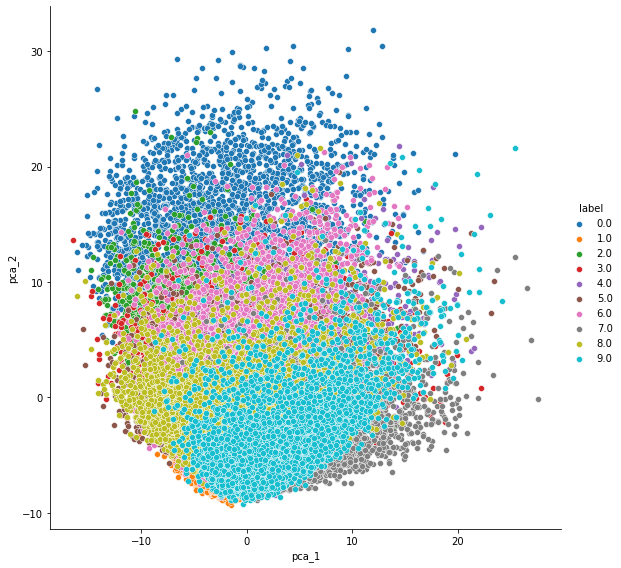

In [19]:
#creates a FacetGrid using Seaborn, where each facet represents a unique value of the 'label' column 
sns.FacetGrid(dataFrame, hue='label', height=8).map(sns.scatterplot, 'pca_1', 'pca_2').add_legend()
plt.show()

### Result : 
Therefore, we were successfully able to implement PCA (dimensionality reduction) from scratch using the MNIST dataset